In [ ]:
from sklearn.datasets import fetch_lfw_people
# min_faces_per_person signifies how many photos should atleast be there
# so as to include when extracting
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [ ]:
images = lfw_people.images
images.shape

(1288, 50, 37)

This shows we have 1288 images with size 50X37
* It basically is image representation in the form of matrix{PIXELS}

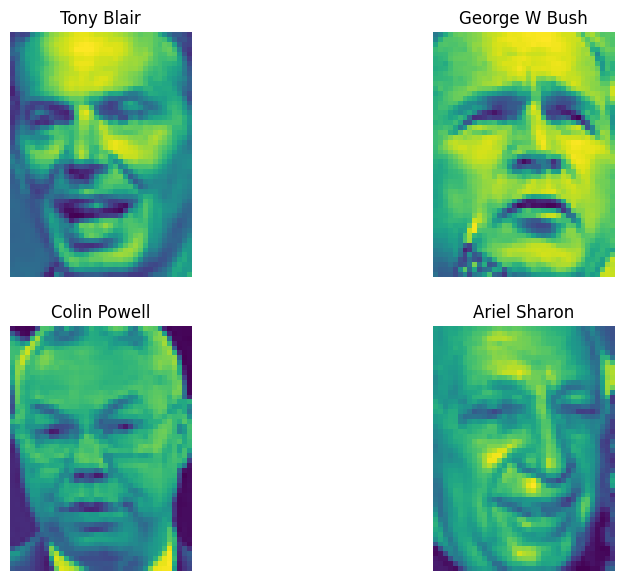

In [ ]:
# displaying multiple images as examples
fig = plt.figure(figsize=(10, 7))

# Say 4 images
for i in range(1, 5):
  fig.add_subplot(2, 2, i)
  plt.imshow(images[i])
  plt.axis('off')
  plt.title(lfw_people.target_names[lfw_people.target[i]])

In [ ]:
# But for easy operations we will be using 1D form of these matrices
# We will be directly using the data function
# This here will be our feature variables
X = lfw_people.data
X.shape

(1288, 1850)

* This shows that the entire 1288 images and 1850 features

In [ ]:
# Visualisation
print(X[0])
print(X[0].shape)

[0.9973857  0.99607843 0.9921568  ... 0.38169935 0.38823533 0.3803922 ]
(1850,)


In [ ]:
# Now for target variable
y = lfw_people.target
y.shape

(1288,)

* Each image has a target that is their name which can be accesed via their categorcal encoded numbers .target

In [ ]:
# Ex
y[1]

6

In [ ]:
# Each category can be used to get their names
names = lfw_people.target_names
names[rand.randint(0, y[np.argmax(y)])]

'Ariel Sharon'

In [ ]:
# Now that we have got features and target
# Lets perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [ ]:
# KNN on original data before PCA
knn = KNeighborsClassifier()

# Model training
knn.fit(X_train,y_train)

# Testing
y_predict = knn.predict(X_test)

# Accuracy
acc_before_knn = accuracy_score(y_test,y_predict)

In [ ]:
# Decision tree before PCA

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

acc_before_dt = accuracy_score(y_test, y_predict)

In [ ]:
# Random Forest before PCA

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

acc_before_rf = accuracy_score(y_test, y_predict)

# PCA

In [ ]:
# First we have to find the mean face
mean_face = np.mean(X_train, axis = 0)

In [ ]:
# Converting 1D to pixel format
face = mean_face.reshape(50, 37)

In [ ]:
# Checking
face.shape

(50, 37)

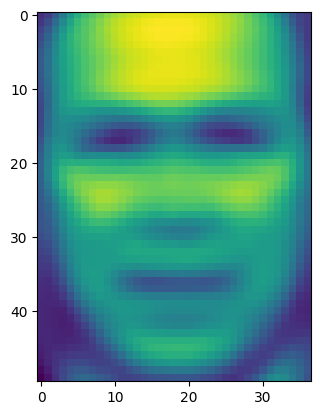

In [ ]:
# Mean face Visualisation
plt.imshow(face)

In [ ]:
# # Now subtract each face with the mean face
X_train -= mean_face
X_test -= mean_face

In [ ]:
class PCA:

  def __init__(self):

    # initializing eigenvalues, eigenvectors
    # and eigenfaces
    self.eigenvalues = None
    self.eigenvectors = None
    self.eigenfaces = None

  def Compute_eigenval_vec(self,X_train):

    # Get covarience matrix
    cov_matrix = np.cov(X_train.T)

    # Get Eigen values and Eigen vectors
    # The values and vectors are pair-wise related
    self.eigenvalues, self.eigenvectors = np.linalg.eigh(cov_matrix)

    # Sorting eigen vectors based on eigen values in descending order
    # As argsort gives ascending order we just have to reverse it
    sorted_indices = np.argsort(self.eigenvalues)[::-1]
    self.eigenvalues = self.eigenvalues[sorted_indices]
    self.eigenvectors = self.eigenvectors[:,sorted_indices]

    return

  def compute_eigenfaces(self, n_components):

    # In eigenvectors eigenfaces are arranged column wise
    self.eigenfaces = self.eigenvectors[:,:n_components]

    return

  def Feature_reduction(self, data, n_components):

    # Get the Projection matrix of required components
    projection_matrix = self.eigenfaces[:,:n_components]

    # Reduce the features by taking dot product between projection matrix
    # and original data
    new_data = np.dot(data, projection_matrix)

    return new_data

  def scree_plot(self):

    x = range(1, len(self.eigenvalues)+1)
    fig = px.scatter(x = x, y = self.eigenvalues,
               labels = {'x':'No.of features','y':'EigenValues'},
               title = 'Scree Plot'
    )

    fig.show()

    # return


    plt.plot(x, self.eigenvalues)
    plt.xlabel('No.of features')
    plt.ylabel('EigenValues')
    plt.title('Scree Plot')

    plt.show()

  def varience_graph(self):

    # varience here means eigenvalues
    varience_fraction = self.eigenvalues / (np.sum(self.eigenvalues))
    cummulative_variance = np.cumsum(varience_fraction)
    x = range(1, len(self.eigenvalues)+1)
    y = cummulative_variance
    fig = px.scatter(x = x, y = y,
               labels = {'x':'n_components','y':'Cummulative Variance'},
               title = 'varience_graph'
    )

    fig.show()

    plt.plot(x, y)
    plt.xlabel('n_components')
    plt.ylabel('Cummulative Variance')
    plt.title('varience_graph')

    plt.show()

    return

In [ ]:
# Create object
pca = PCA()

In [ ]:
# Get PC's
pca.Compute_eigenval_vec(X_train)

In [ ]:
# compute eigenfaces
pca.compute_eigenfaces(162)

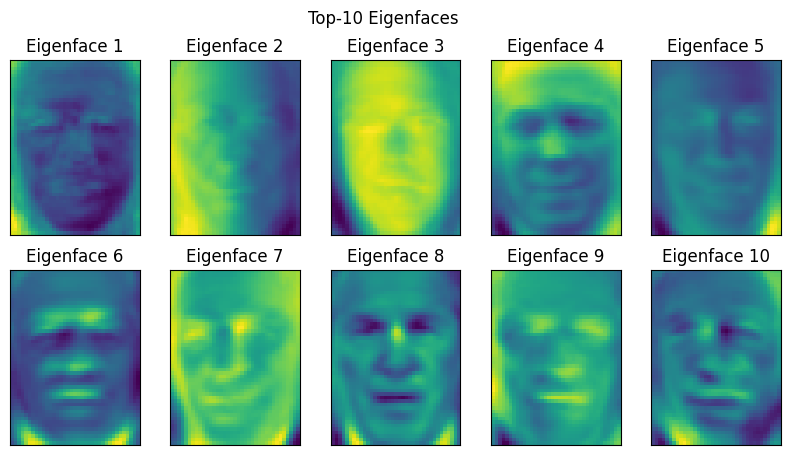

In [ ]:
# Plot the top-10 eigenfaces
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(pca.eigenfaces[:,i].reshape(50, 37))
    plt.title(f"Eigenface {i + 1}")
    plt.xticks(())
    plt.yticks(())

plt.suptitle("Top-10 Eigenfaces")
plt.show()

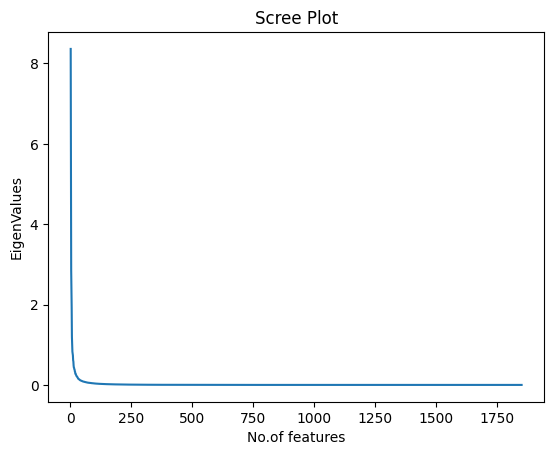

In [ ]:
# Scree plot
pca.scree_plot()

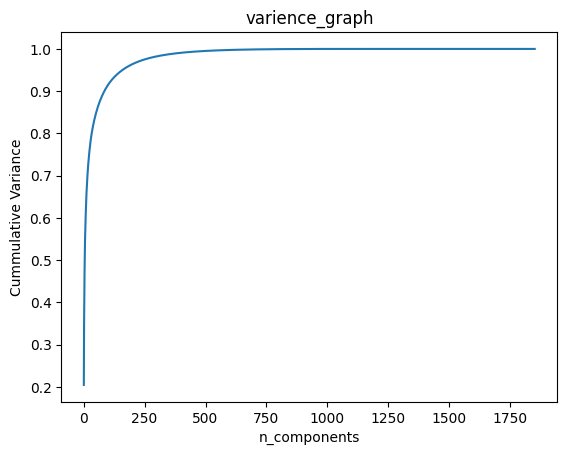

In [ ]:
# Varience graph
pca.varience_graph()

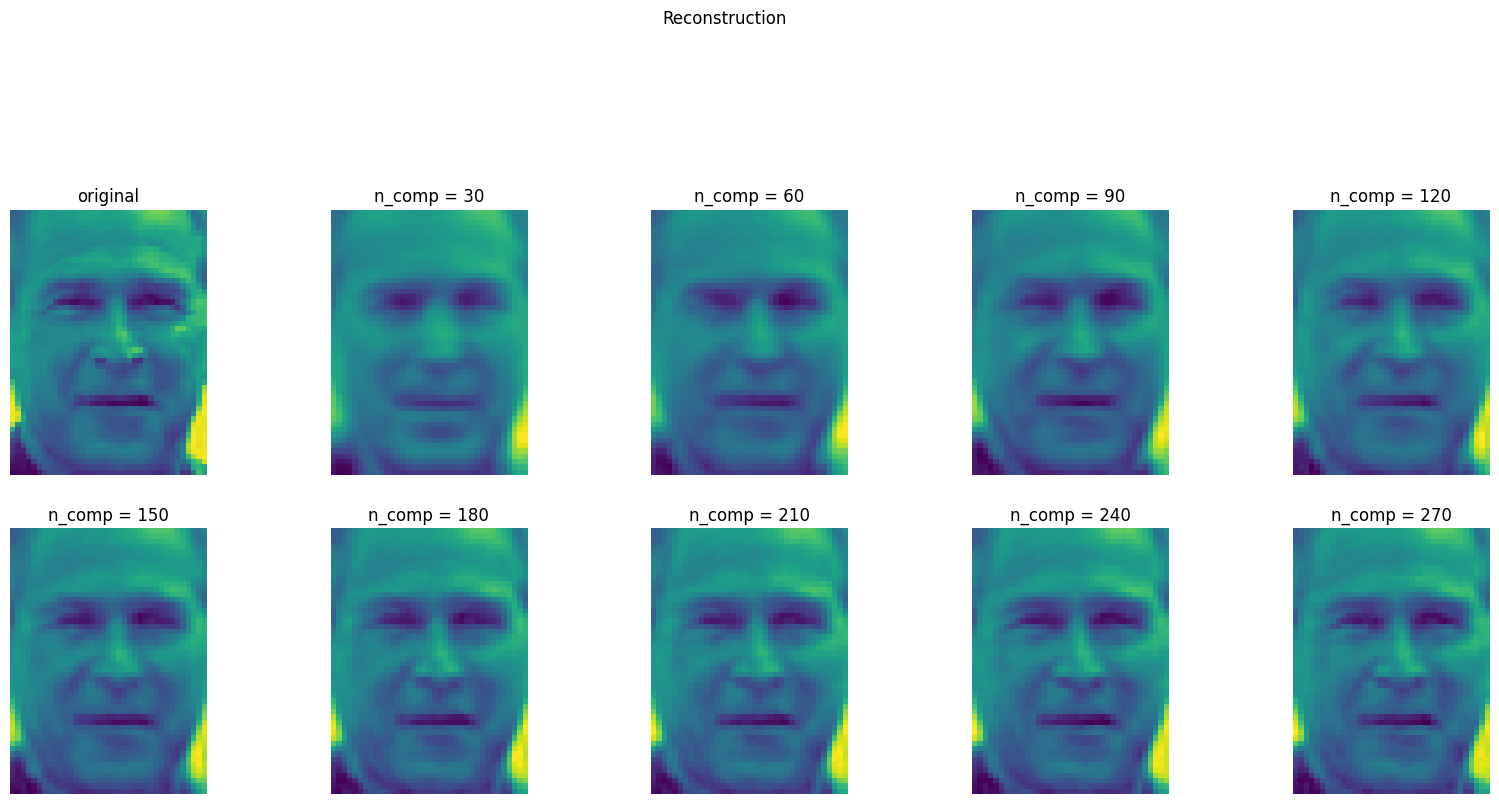

In [ ]:
# Plot the top-10 eigenfaces
plt.figure(figsize=(20, 20))
for i in range(10):
    if i == 0:
      plt.subplot(5, 5, i + 1)
      plt.imshow((X_train[0] + mean_face).reshape(50, 37))
      plt.axis('off')
      plt.title('original')
    else:
      plt.subplot(5, 5, i + 1)
      pca.compute_eigenfaces(i * 30)
      X_train_ = pca.Feature_reduction(X_train, i * 30)
      X_re = np.dot(X_train_, pca.eigenfaces.T)
      X_re += mean_face
      plt.imshow(X_re[0].reshape(50, 37))
      plt.axis('off')
      plt.title('n_comp = ' + str(i * 30))


plt.suptitle("Reconstruction")
plt.show()

In [ ]:
# Projecting data on choosen number of n_comp
X_train_ = pca.Feature_reduction(X_train, 162)
X_test_ = pca.Feature_reduction(X_test, 162)
# compute eigenfaces
pca.compute_eigenfaces(162)

In [ ]:
# Checking
X_train_.shape

(1030, 162)

In [ ]:
# Now let's try reconstructing the data
X_re = np.dot(X_train_, pca.eigenfaces.T)

In [ ]:
# adding mean to it
X_re += mean_face

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
target_names = []
for i in range(7):
  target_names.append(names[i])

In [ ]:
# KNN on projected data
knn = KNeighborsClassifier()

# Model training
knn.fit(X_train_,y_train)

# Testing
y_predict_knn = knn.predict(X_test_)

# Accuracy
acc_after_knn = accuracy_score(y_test,y_predict_knn)

In [ ]:
# variation in accuracy before and after PCA
print("Before PCA", acc_before_knn)
print("After PCA", acc_before_knn)
print("Difference", acc_before_knn - acc_after_knn)

Before PCA 0.5581395348837209
After PCA 0.5581395348837209
Difference 0.0


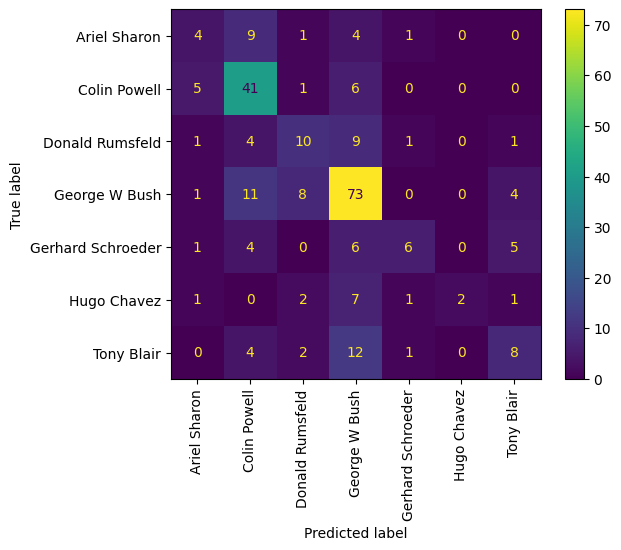

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_predict_knn)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = target_names)
cm_display.plot()
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_test, y_predict_knn, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.31      0.21      0.25        19
     Colin Powell       0.56      0.77      0.65        53
  Donald Rumsfeld       0.42      0.38      0.40        26
    George W Bush       0.62      0.75      0.68        97
Gerhard Schroeder       0.60      0.27      0.37        22
      Hugo Chavez       1.00      0.14      0.25        14
       Tony Blair       0.42      0.30      0.35        27

         accuracy                           0.56       258
        macro avg       0.56      0.40      0.42       258
     weighted avg       0.56      0.56      0.53       258



In [ ]:
# Decision tree after PCA

model = DecisionTreeClassifier()
model.fit(X_train_, y_train)
y_predict_dt = model.predict(X_test_)

acc_after_dt = accuracy_score(y_test, y_predict_dt)

In [ ]:
# variation in accuracy before and after PCA
print("Before PCA", acc_before_dt)
print("After PCA", acc_before_dt)
print("Difference", acc_before_dt - acc_after_dt)

Before PCA 0.4728682170542636
After PCA 0.4728682170542636
Difference 0.05813953488372092


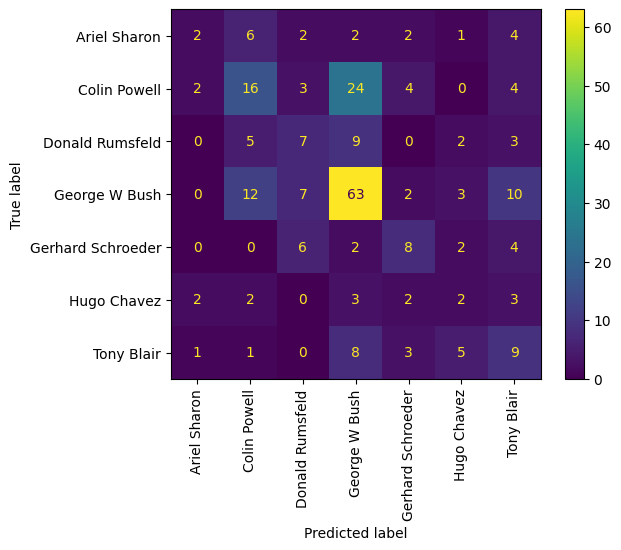

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_predict_dt)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = target_names)
cm_display.plot()
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_test, y_predict_dt, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.29      0.11      0.15        19
     Colin Powell       0.38      0.30      0.34        53
  Donald Rumsfeld       0.28      0.27      0.27        26
    George W Bush       0.57      0.65      0.61        97
Gerhard Schroeder       0.38      0.36      0.37        22
      Hugo Chavez       0.13      0.14      0.14        14
       Tony Blair       0.24      0.33      0.28        27

         accuracy                           0.41       258
        macro avg       0.32      0.31      0.31       258
     weighted avg       0.41      0.41      0.40       258



In [ ]:
# Random Forest after PCA

model = RandomForestClassifier()
model.fit(X_train_, y_train)
y_predict_rf = model.predict(X_test_)

acc_after_rf = accuracy_score(y_test, y_predict_rf)

In [ ]:
# variation in accuracy before and after PCA
print("Before PCA", acc_before_rf)
print("After PCA", acc_before_rf)
print("Difference", acc_before_rf - acc_after_rf)

Before PCA 0.5968992248062015
After PCA 0.5968992248062015
Difference 0.10852713178294571


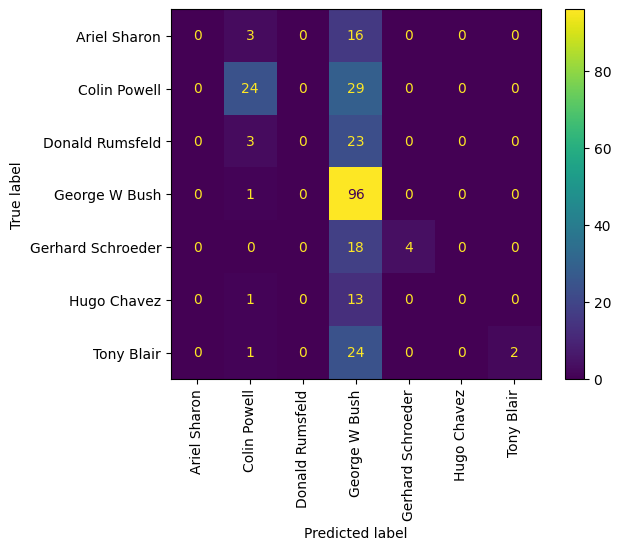

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_predict_rf)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = target_names)
cm_display.plot()
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_test, y_predict_rf, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        19
     Colin Powell       0.73      0.45      0.56        53
  Donald Rumsfeld       0.00      0.00      0.00        26
    George W Bush       0.44      0.99      0.61        97
Gerhard Schroeder       1.00      0.18      0.31        22
      Hugo Chavez       0.00      0.00      0.00        14
       Tony Blair       1.00      0.07      0.14        27

         accuracy                           0.49       258
        macro avg       0.45      0.24      0.23       258
     weighted avg       0.50      0.49      0.38       258



* It is possible that the accuracy of the model is better after PCA reasons being

1.   remove noise
2.   irrelevant information

In [ ]:
values, counts = np.unique(lfw_people.target, return_counts=True)

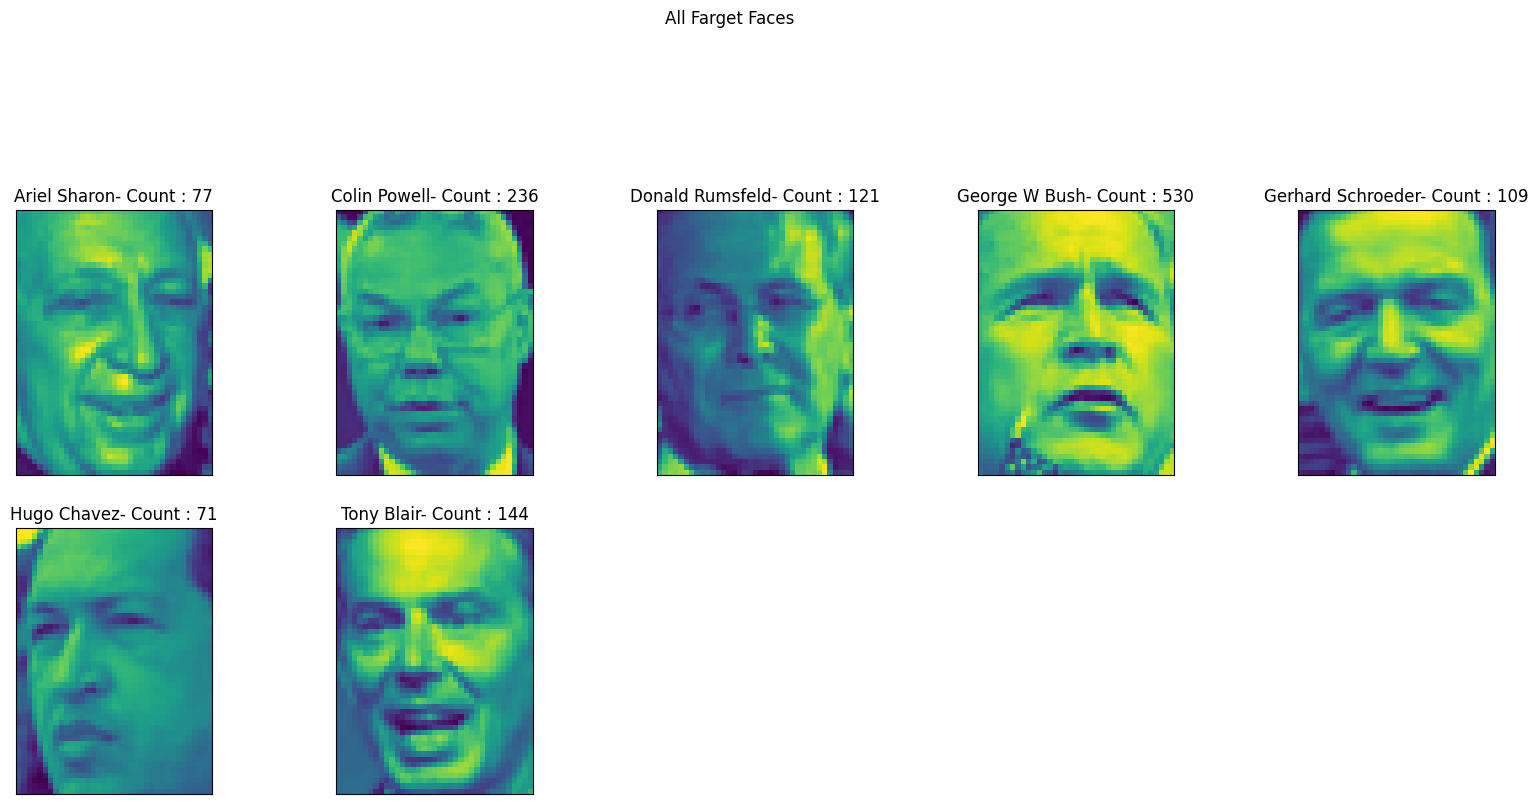

In [ ]:
# Plot the top-10 eigenfaces
plt.figure(figsize=(20, 20))
for i in range(7):
    plt.subplot(5, 5, i + 1)
    for j in range(len(images)):
      if lfw_people.target[j] == i:
        plt.imshow(images[j].reshape(50, 37))
        plt.title(lfw_people.target_names[lfw_people.target[j]] + '- Count : '
                   + str(counts[i]))
        plt.xticks(())
        plt.yticks(())
        break

plt.suptitle("All Farget Faces")
plt.show()

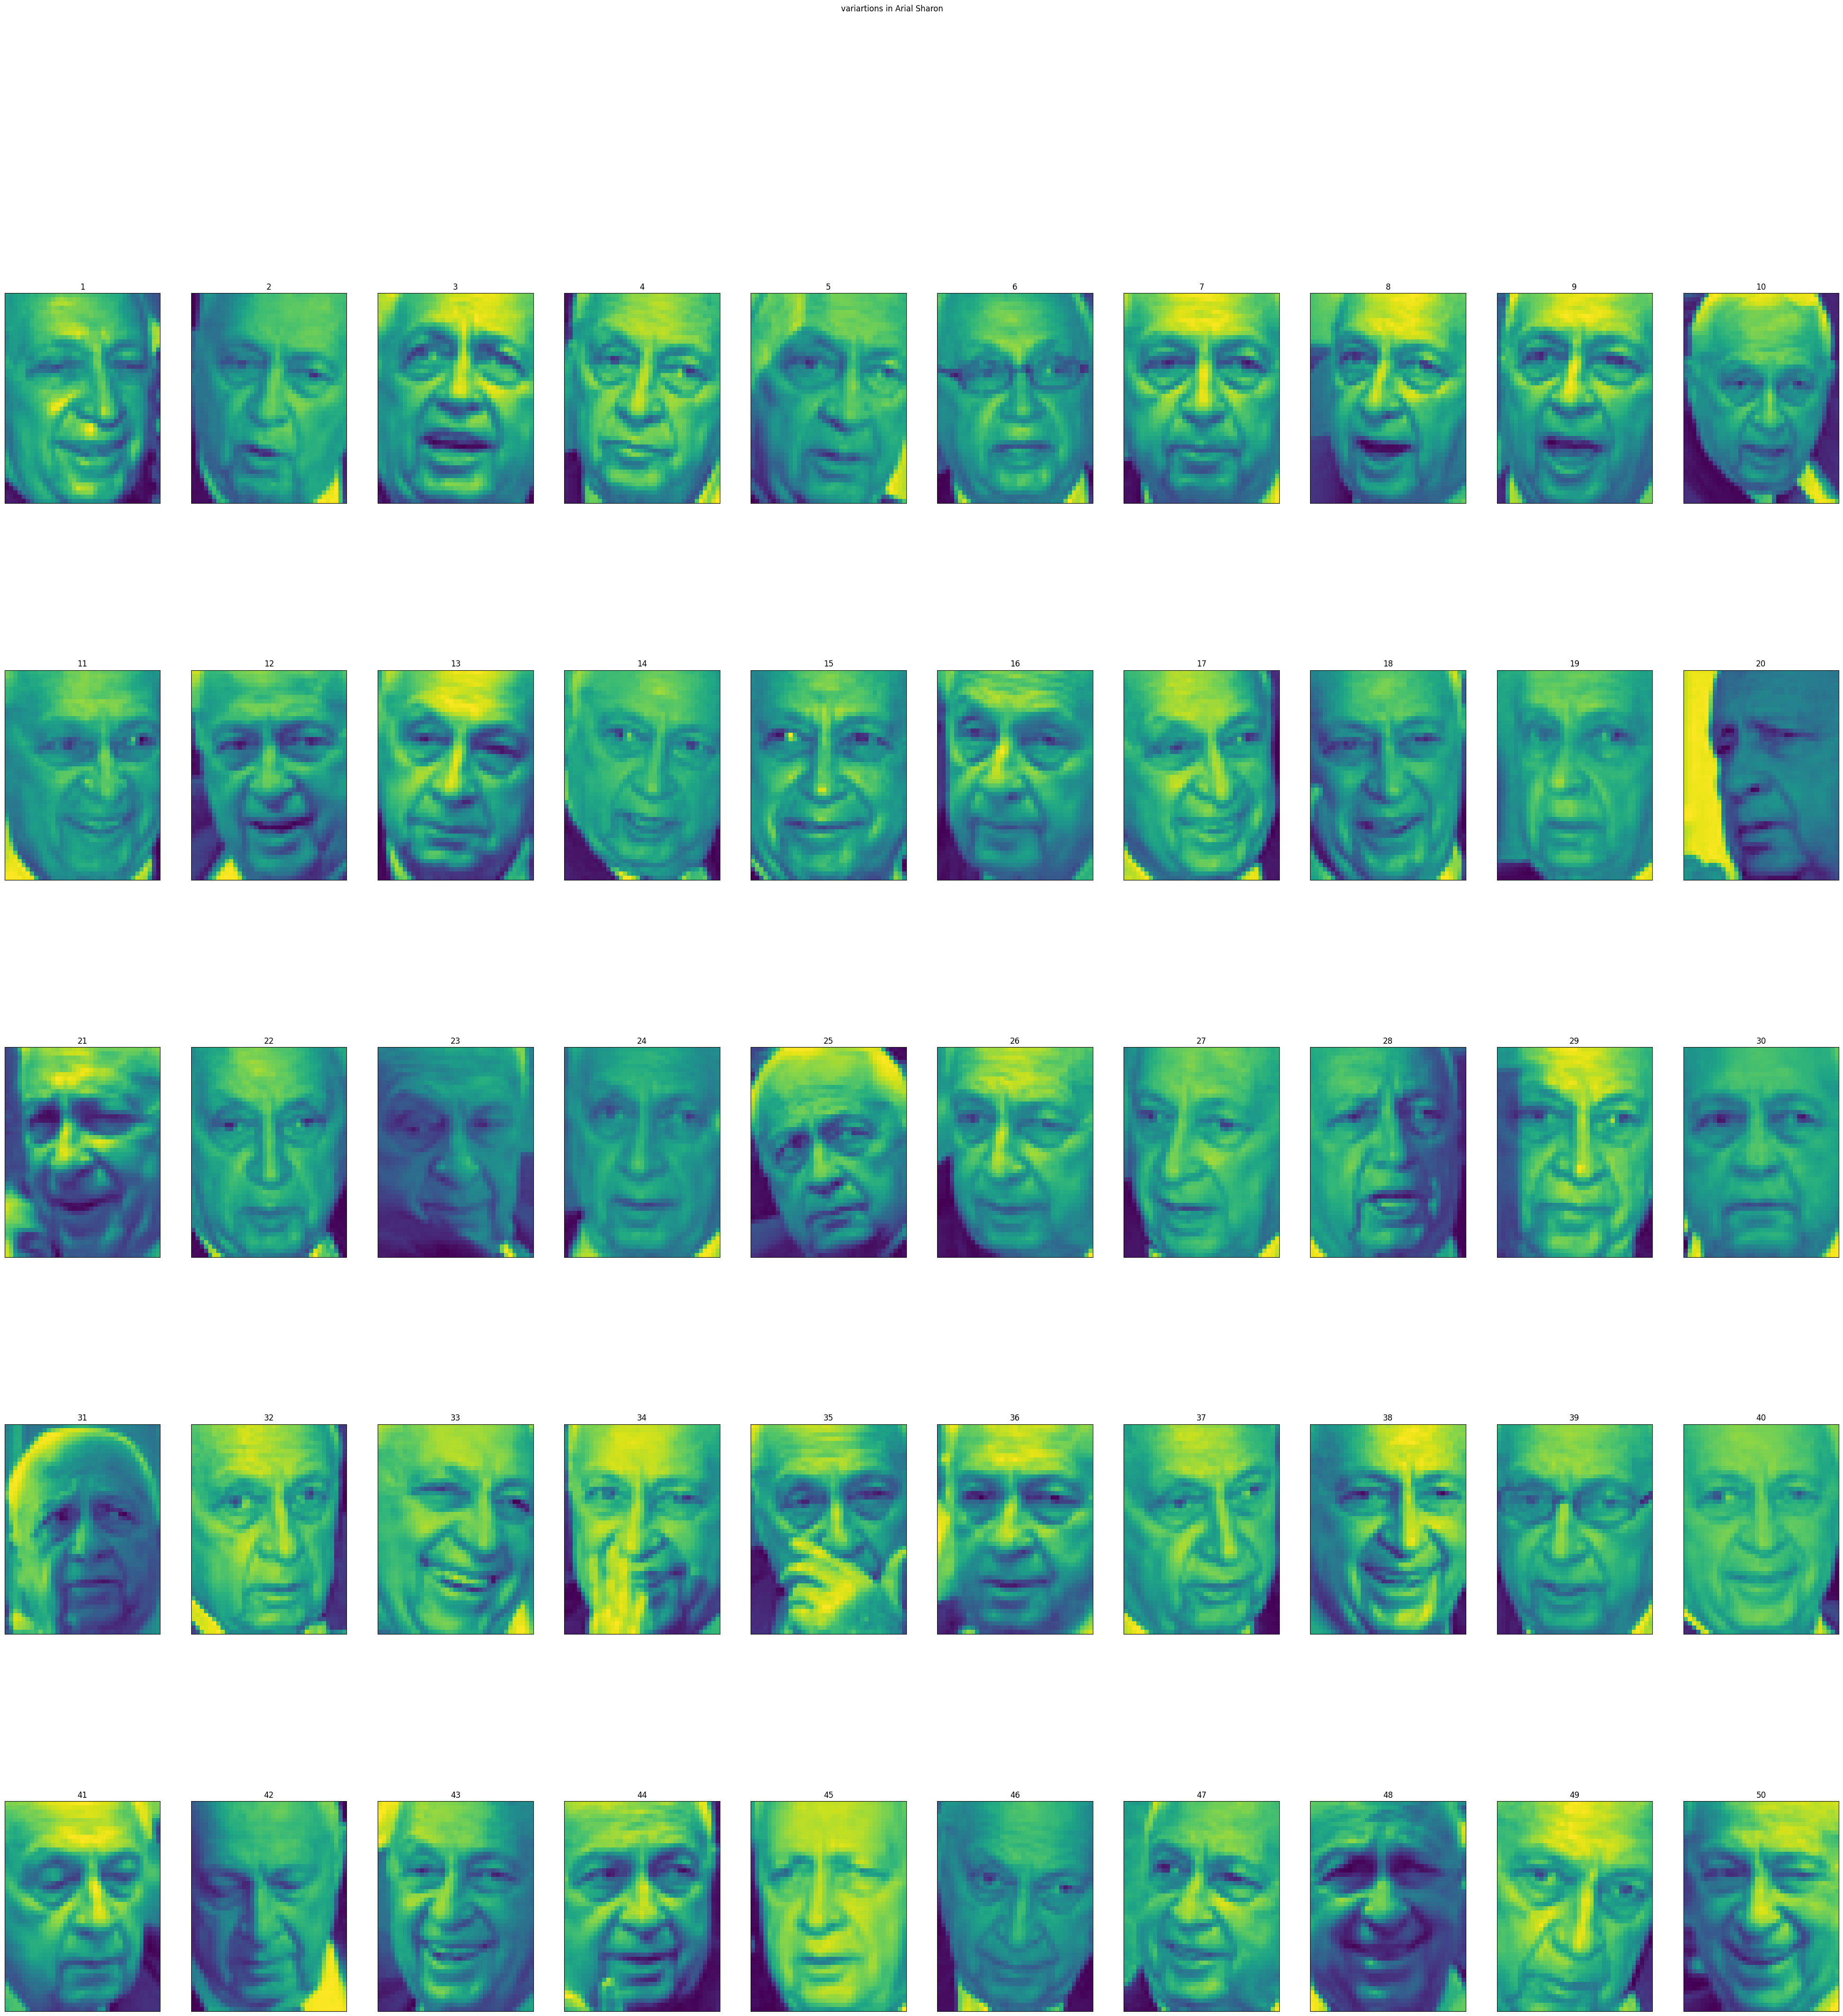

In [ ]:
# variartions in one target
plt.figure(figsize=(50, 50))

count  = -1
for j in range(len(images)):
  if lfw_people.target[j] == 0:
    count += 1
    plt.subplot(5, 10, count + 1)
    plt.imshow(images[j].reshape(50, 37))
    plt.title(str(count + 1))
    plt.xticks(())
    plt.yticks(())
    if count == 49:
      break


plt.suptitle("variartions in Arial Sharon")
plt.show()

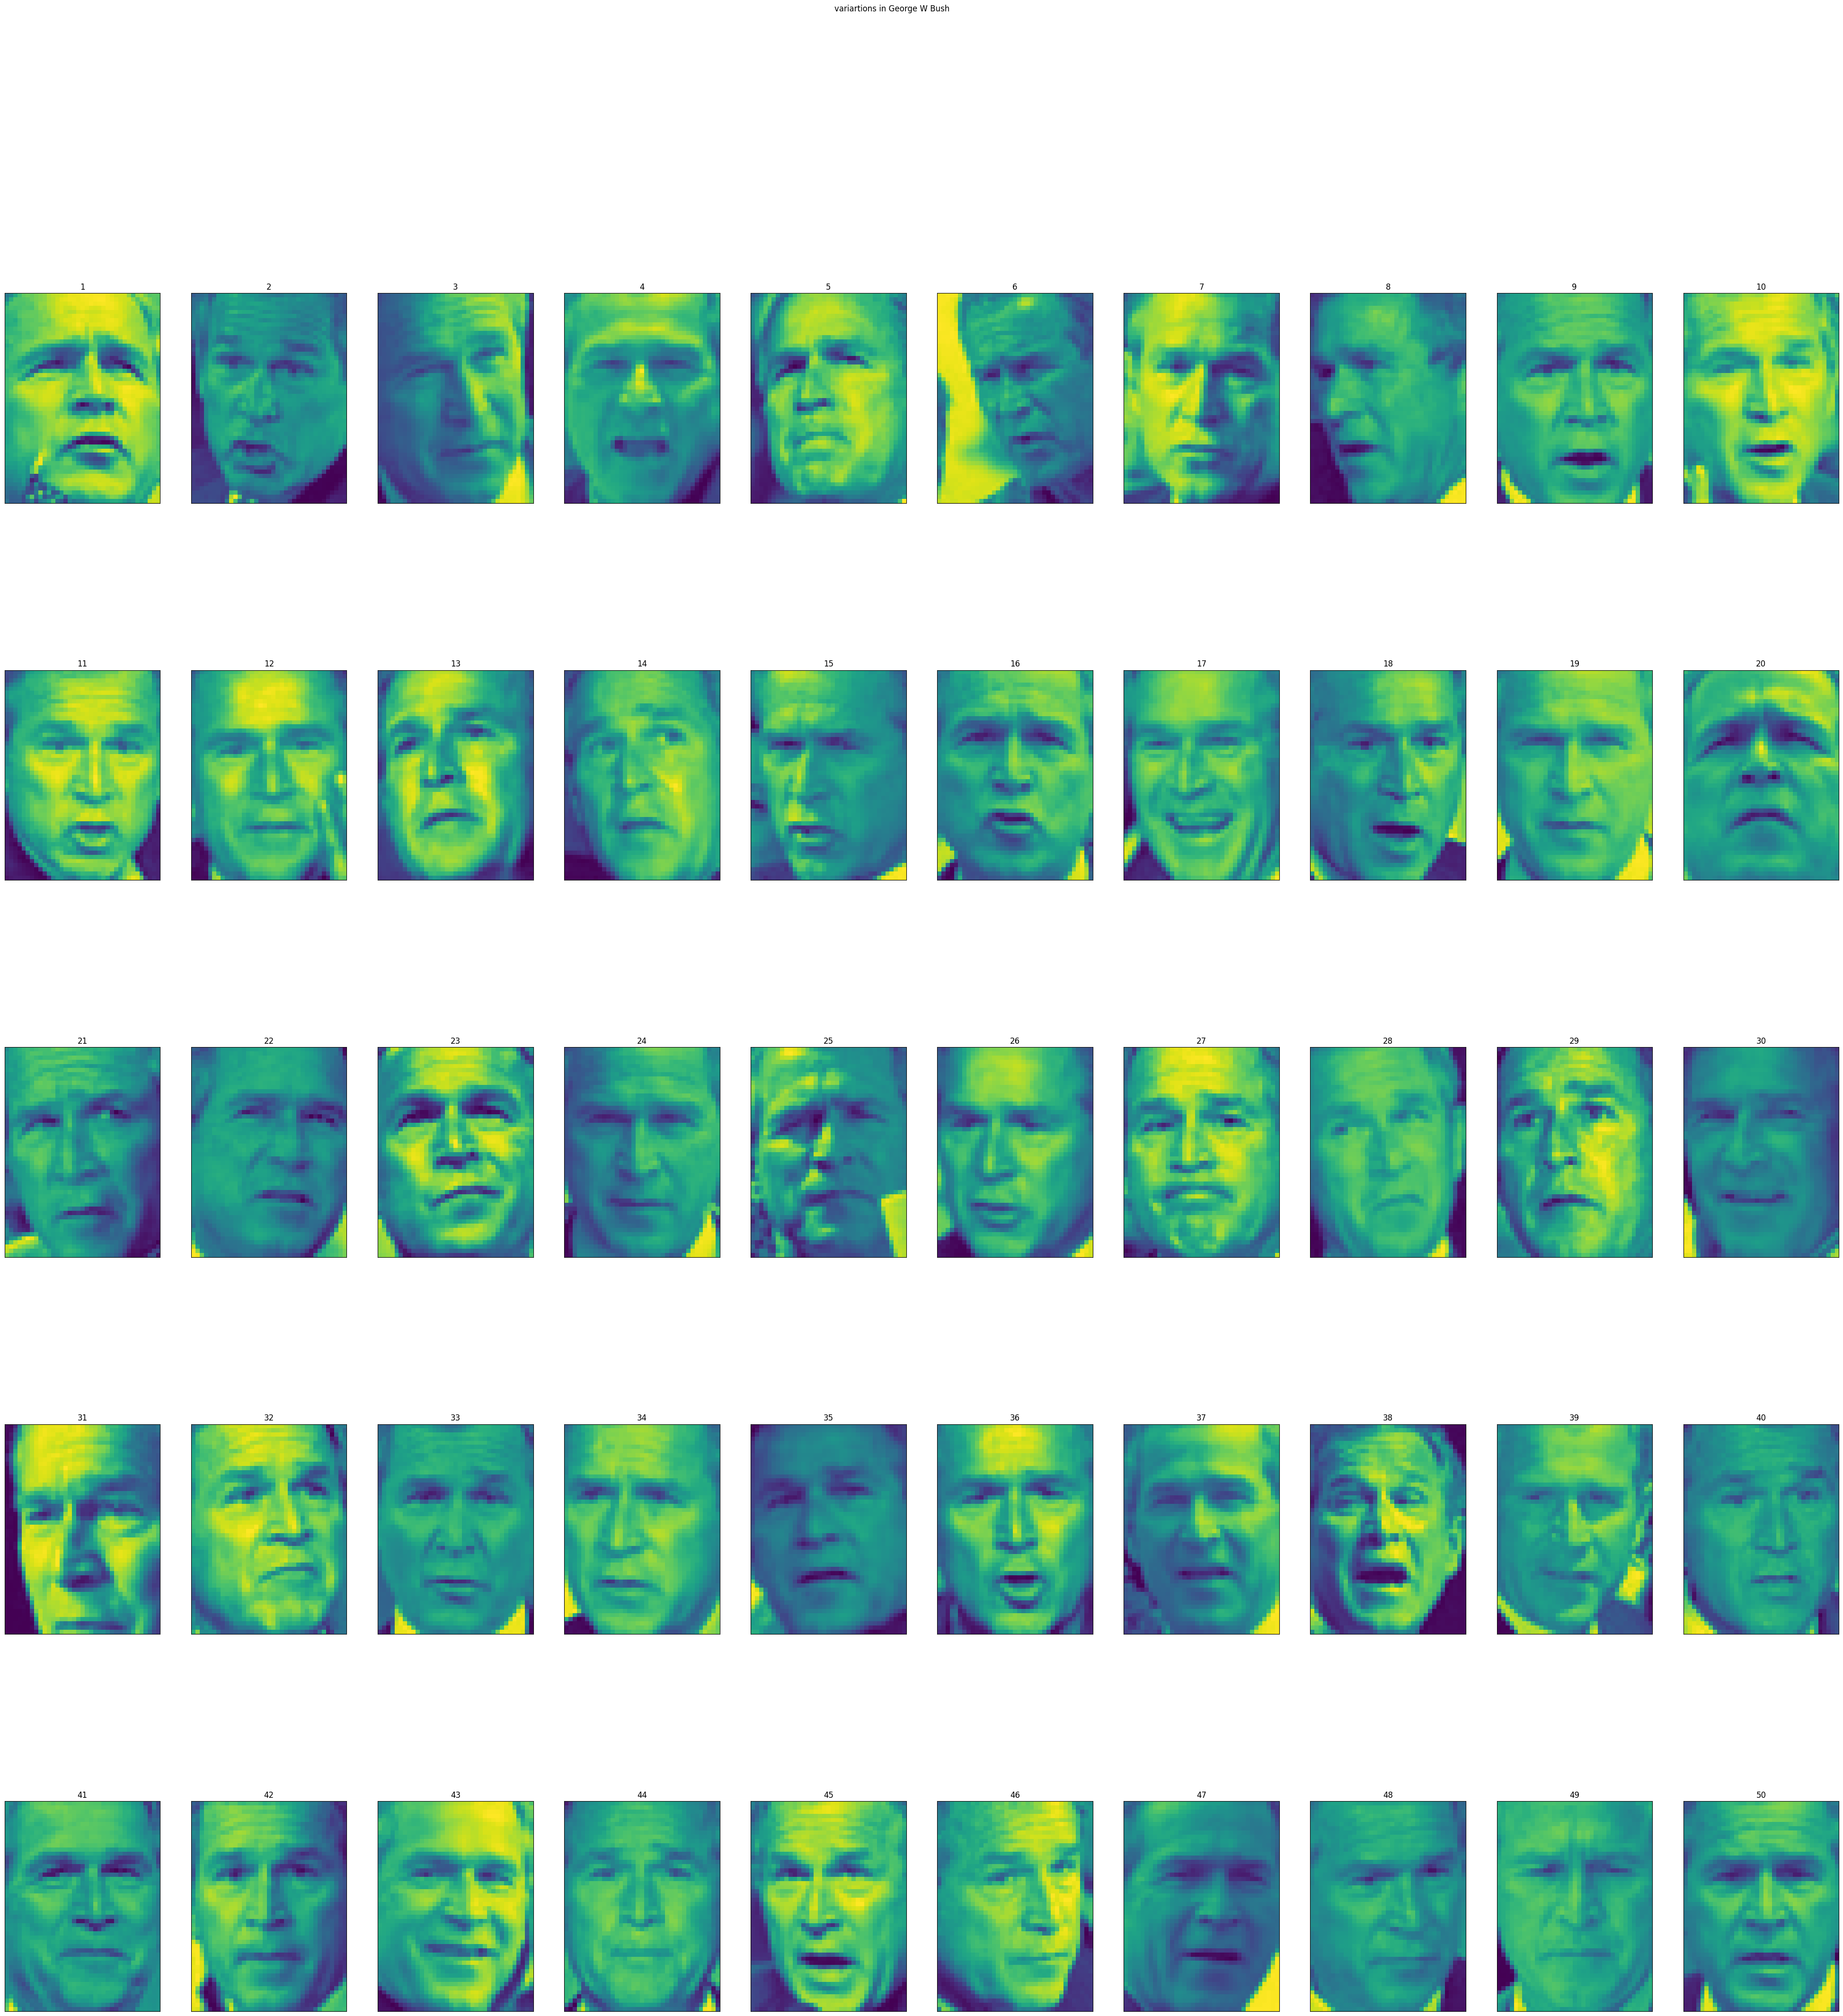

In [ ]:
# variartions in one target
plt.figure(figsize=(50, 50))

count  = -1
for j in range(len(images)):
  if lfw_people.target[j] == 3:
    count += 1
    plt.subplot(5, 10, count + 1)
    plt.imshow(images[j].reshape(50, 37))
    plt.title(str(count + 1))
    plt.xticks(())
    plt.yticks(())
    if count == 49:
      break


plt.suptitle("variartions in George W Bush")
plt.show()

# Reasons For Misclassification


1.   The count of George W-Bush is 530 which is like 52% of data {More Weight}
      and for Hugo Chavez it is only 7% {Less weights}
  *   Overfitting on George W-Bush
  *   Underfitting on Hugo Chavez
2.   The images provided are not uniform, meaning :

  *   Few images have glasses
  *   Face is covered by hands
  *   Eyes are closed
  *   Teeth is visible
  *   Few are way darker and other more brighter {CONTRAST}
  *   Entire head is visible
  *   Clothes are visible
  *   Some are left dominant and other right dominant poses
  *   In some lips are closed
  *   Some are happy, sad, Excited, scared



In [ ]:
# Checking for OUTLIERS via Z-SCORE
data = lfw_people.data
mean = np.mean(data, axis = 0)
stand_dev = np.std(data, axis = 0)

min = mean - 3 * stand_dev
max = mean + 3 * stand_dev
final = []

for i in data:
  if (i > min).all and (i < max).all:
    final.append(i)
print(len(final), len(data))

1288 1288


* We see that there are no outliers in the data  

# To see how accuracy is dependent on n_components

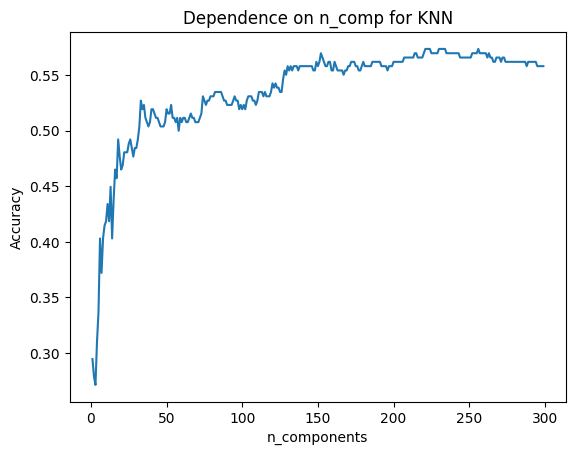

In [ ]:
# varience here means eigenvalues

x = range(1, 300)
y = []

for i in x:
  # compute eigenfaces
  pca.compute_eigenfaces(i)
  # Projecting data on choosen number of n_comp
  X_train_ = pca.Feature_reduction(X_train, i)
  X_test_ = pca.Feature_reduction(X_test, i)
  # KNN on projected data
  knn = KNeighborsClassifier()
  # Model training
  knn.fit(X_train_,y_train)
  # Testing
  y_predict_knn = knn.predict(X_test_)
  # Accuracy
  y.append(accuracy_score(y_test,y_predict_knn))

fig = px.scatter(x = x, y = y,
                labels = {'x':'n_components','y':'Accuracy'},
                title = 'Dependence on n_comp for KNN'
                )

fig.show()
plt.plot(x, y)
plt.xlabel('n_components')
plt.ylabel('Accuracy')
plt.title('Dependence on n_comp for KNN')

plt.show()

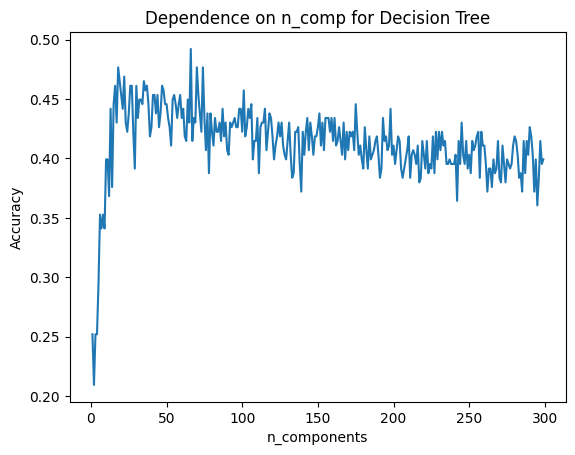

In [ ]:
# varience here means eigenvalues

x = range(1, 300)
y = []

for i in x:
  # compute eigenfaces
  pca.compute_eigenfaces(i)
  # Projecting data on choosen number of n_comp
  X_train_ = pca.Feature_reduction(X_train, i)
  X_test_ = pca.Feature_reduction(X_test, i)
  # dt on projected data
  dt = DecisionTreeClassifier()
  # Model training
  dt.fit(X_train_,y_train)
  # Testing
  y_predict_dt = dt.predict(X_test_)
  # Accuracy
  y.append(accuracy_score(y_test,y_predict_dt))

fig = px.scatter(x = x, y = y,
                labels = {'x':'n_components','y':'Accuracy'},
                title = 'Dependence on n_comp for Decision Tree'
                )

fig.show()
plt.plot(x, y)
plt.xlabel('n_components')
plt.ylabel('Accuracy')
plt.title('Dependence on n_comp for Decision Tree')

plt.show()

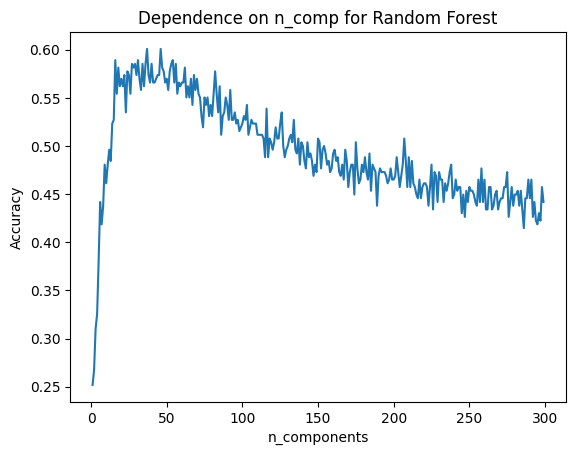

In [ ]:
# varience here means eigenvalues

x = range(1, 300)
y = []

for i in x:
  # compute eigenfaces
  pca.compute_eigenfaces(i)
  # Projecting data on choosen number of n_comp
  X_train_ = pca.Feature_reduction(X_train, i)
  X_test_ = pca.Feature_reduction(X_test, i)
  # rf on projected data
  rd = RandomForestClassifier()
  # Model training
  rd.fit(X_train_,y_train)
  # Testing
  y_predict_rd = rd.predict(X_test_)
  # Accuracy
  y.append(accuracy_score(y_test,y_predict_rd))

fig = px.scatter(x = x, y = y,
                labels = {'x':'n_components','y':'Accuracy'},
                title = 'Dependence on n_comp for Random Forest'
                )

fig.show()
plt.plot(x, y)
plt.xlabel('n_components')
plt.ylabel('Accuracy')
plt.title('Dependence on n_comp for Random Forest')

plt.show()

In [ ]:
import random as rand
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import warnings
# Ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
import time

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [ ]:
import plotly.express as px